# Image Combination and Processing Tutorial/Boilerplate

This notebook will help you create median combined flat field images from the WIYN 0.9m

In [1]:
import astropy.io.fits as fits
import numpy as np
import glob

In [2]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
##read in a sample 0.9m image and print it's dimensions
image1 = fits.getdata("data/wiyn0_9/2016june18/NGC6240/c7558t0054o00.fits")
image1.shape

(4150, 4150)

In [8]:
##Tell the program how many flat images to combine
nims = 87   ##insert the number of images here before the ##
first_frame = 42 # specify the number of the first frame of the set you want to combine.

##insert the path to the file and basic string that starts out the name of all of the files, 
#in quotations. 

basestring = "/mnt/camp-storage/ATC2016/wiyn_09/Converted2016june19/c7559t"
              ## For example, "/mnt/camp-storage/ATC2016/wiyn_09/Converted2016june20/c7559t"


In [11]:
##this piece takes your input above and makes a
#3D "cube" of bias-subtracted images for you to work with
dim = len(image1[0])
image_bsub = np.zeros((dim,dim,nims))

for i,file_index in enumerate(range(first_frame,first_frame+nims)):
    filename = basestring+'%04i' % file_index +'f00.fits'
    print(filename)
    image = fits.getdata(filename)
    ## subtract the bias from the bias overscan regions
    overscan=image[4100:4140,4100:4140]
    overscan_mean = mean(overscan)
    image_bsub[:,:,i] = image - overscan_mean

/mnt/camp-storage/ATC2016/wiyn_09/Converted2016june19/c7559t0042f00.fits


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/camp-storage/ATC2016/wiyn_09/Converted2016june19/c7559t0042f00.fits'

In [9]:
##now we'll take the median combination of these images
median_image = median(image_bsub, axis=2)

In [10]:
median_image.shape

(4150, 4150)

In [14]:
fits.getheader(filename)

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 4150 / Axis length                                    
NAXIS2  =                 4150 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
BSCALE  =           1.000000E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =           3.276800E4 /                                                
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2016-06-18T18:58:39' / Date FITS file was generated                  
IRAF-TLM= '2016-06-18T18:58:37' / Time of last modification                     
OBJECT  = '29P     '           / Name of the object observed                    
NEXTEND =                   

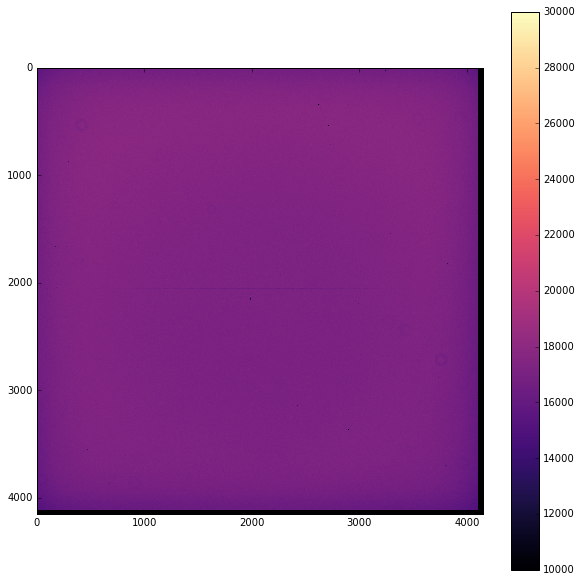

In [12]:
## plot this median image, you may need to add some keywords to imshow to see anything
figure(figsize=(10,10))
imshow(median_image, cmap='magma', vmax=30000, vmin=10000) 
colorbar()

In [13]:
## write out your new image as a .fits file

fname = "/mnt/camp-storage/ATC2016/wiyn_09/flats/6-17_H-alpha.fits"  ##fill in your desired filename here, in quotes, for example "Rflat.fits"
fits.writeto(fname, median_image) 
#if you need to overwrite an existing file, add: clobber=True
